In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [192]:
dataset = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
dataset.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [193]:
dataset.drop("AverageTemperatureUncertainty", axis = 1, inplace = True)

In [194]:
dataset.rename(columns = {"AverageTemperature":"avg_temp"}, inplace = True)

In [195]:
dataset = dataset[dataset["Country"] == "Turkey"][["dt", "avg_temp"]]

In [196]:
dataset.head()

,dt,avg_temp
533683,1777-02-01,3.000
533684,1777-03-01,NaN
533685,1777-04-01,7.678
533686,1777-05-01,15.293
533687,1777-06-01,18.661


In [197]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2840 entries, 533683 to 536522
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt        2840 non-null   object 
 1   avg_temp  2838 non-null   float64
dtypes: float64(1), object(1)
memory usage: 66.6+ KB


In [198]:
dataset.isnull().sum()

dt          0
avg_temp    2
dtype: int64

In [199]:
dataset.dropna(axis = 0, how = "any", inplace = True)

In [200]:
dataset.describe()

,avg_temp
count,2838.000000
mean,11.631567
std,7.925874
min,-4.523000
25%,4.326000
50%,11.678500
75%,19.063750
max,26.273000


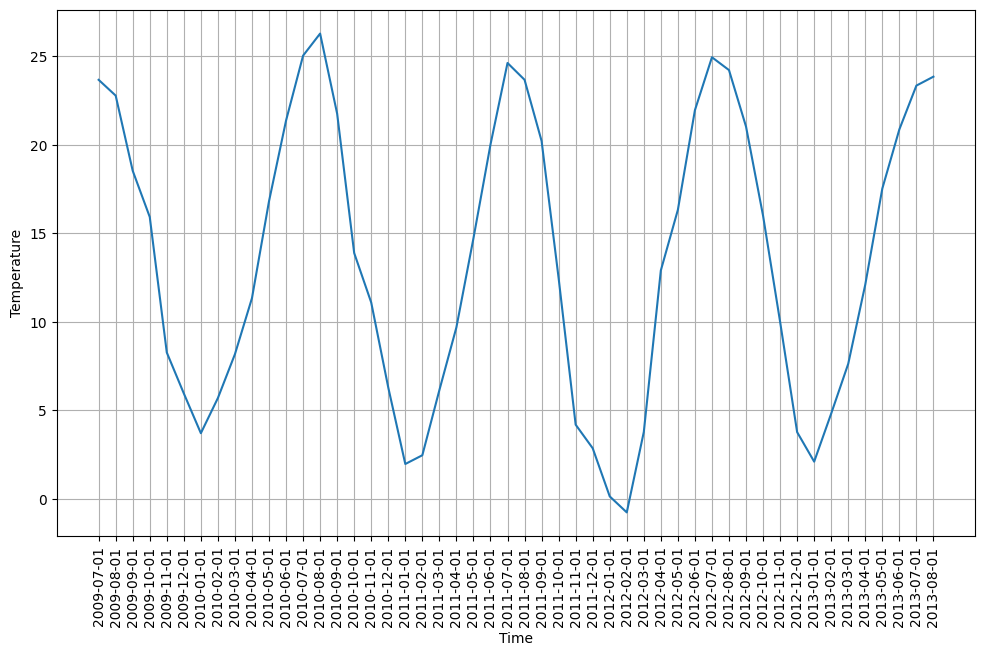

In [201]:
plt.figure(figsize = (10,6))
plt.plot(dataset["dt"][-50:], dataset["avg_temp"][-50:], label = "Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid()
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

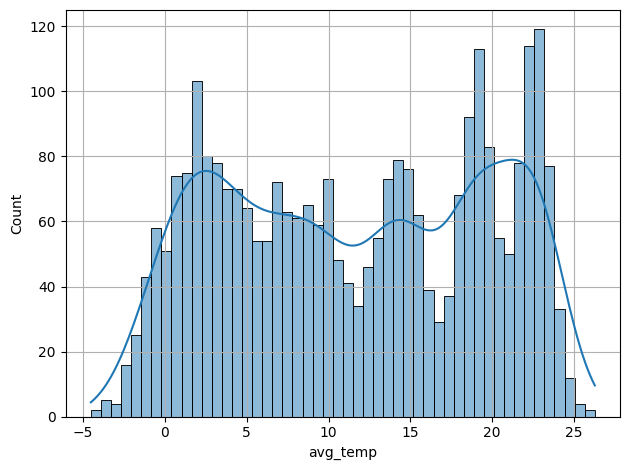

In [202]:
plt.figure()
sns.histplot(data = dataset, x = dataset["avg_temp"], bins = 50, kde = True)
plt.grid()
plt.tight_layout()
plt.show()

In [203]:
dataset

,dt,avg_temp
533683,1777-02-01,3.000
533685,1777-04-01,7.678
533686,1777-05-01,15.293
533687,1777-06-01,18.661
533688,1777-07-01,20.757
...,...,...
536517,2013-04-01,12.102
536518,2013-05-01,17.522
536519,2013-06-01,20.862
536520,2013-07-01,23.335


In [204]:
dataset["dt"] = pd.to_datetime(dataset["dt"], format = "%Y-%m-%d")
dataset.set_index("dt", inplace = True)
dataset.head()

,avg_temp
dt,
1777-02-01,3.000
1777-04-01,7.678
1777-05-01,15.293
1777-06-01,18.661
1777-07-01,20.757


In [205]:
data = dataset["avg_temp"].values.astype(np.float32)

In [206]:
split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

In [207]:
train_data.shape, test_data.shape

((2270,), (568,))

In [208]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [209]:
train_data.shape, test_data.shape

((2270, 1), (568, 1))

In [210]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train_data = sc.fit_transform(train_data)
scaled_test_data = sc.transform(test_data)
joblib.dump(sc, "scaler.save")

['scaler.save']

In [211]:
def create_sequence(data):
    X = []
    y = []
    input_window = 30
    output_window = 10
    total_window = input_window + output_window
    for i in range(len(data) - total_window):
        X.append(data[i : i + input_window])
        y.append(data[i + input_window : i + total_window])
    return np.array(X), np.array(y)

X_train_array, y_train_array = create_sequence(data = scaled_train_data)
X_test_array, y_test_array = create_sequence(data = scaled_test_data) 

In [214]:
X_train_array.shape, y_train_array.shape

((2230, 30, 1), (2230, 10, 1))

In [215]:
X_test_array.shape, y_test_array.shape

((528, 30, 1), (528, 10, 1))

In [216]:
np.save("X_train_array.npy", X_train_array)
np.save("X_test_array.npy", X_test_array)
np.save("y_train_array.npy", y_train_array)
np.save("y_test_array.npy", y_test_array)